In [47]:
import requests
import io
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [48]:
now = dt.now()

In [49]:
# Получаем данные по ключевой ставке с сайт ЦБ РФ
cbr_key_rate_url = f"https://www.cbr.ru/hd_base/KeyRate/?UniDbQuery.Posted=True&UniDbQuery.From=17.09.2013&UniDbQuery.To={now.strftime('%d.%m.%Y')}"
r = requests.get(cbr_key_rate_url, timeout=30)
r.raise_for_status()

# Выгружаем полученные данные в pandas.DataFrame
cbr_key_rate_df = pd.read_html(io.StringIO(r.text))[0]
cbr_key_rate_df.columns = ["report_date", "key_rate"]

# Приведение типов данных
cbr_key_rate_df["report_date"] = pd.to_datetime(cbr_key_rate_df["report_date"], format="%d.%m.%Y")
cbr_key_rate_df["key_rate"] = cbr_key_rate_df["key_rate"] / 100

In [52]:
# Группируем помесячно для нахождения среднемесячной ключевой ставки
monthly_key_rate_df = cbr_key_rate_df.groupby(pd.Grouper(key="report_date", freq="ME"))["key_rate"].mean()

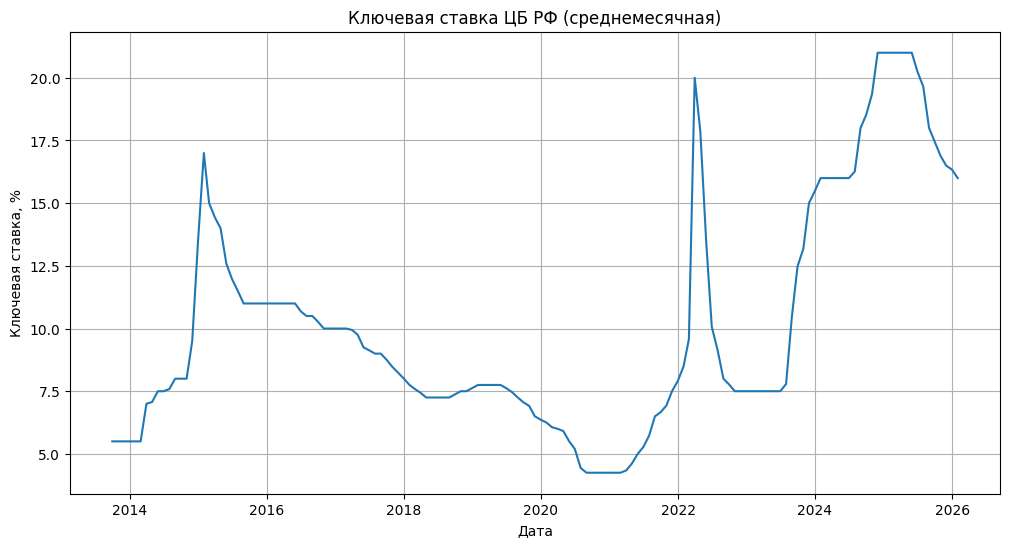

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_key_rate_df.index, monthly_key_rate_df.values)
plt.title("Ключевая ставка ЦБ РФ (среднемесячная)")
plt.xlabel("Дата")
plt.ylabel("Ключевая ставка, %")
plt.grid(True)
plt.show()
